# IMPORT LIBRARIES

In [26]:
!pip install imblearn

In [62]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

# Load dataset

In [28]:
df = pd.read_csv('Tweets.csv')
df = pd.DataFrame(df)

**Now Check the Head and Tail of the dataset**

In [29]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [30]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


**EDA Part**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [32]:
# Calculate the average length of tweets
df['tweet_length'] = df['text'].apply(len)
average_length = df['tweet_length'].mean()

print(f"The average length of tweets is: {average_length:.2f} characters")


The average length of tweets is: 103.82 characters


min tweet length: 12 and max tweet length: 186


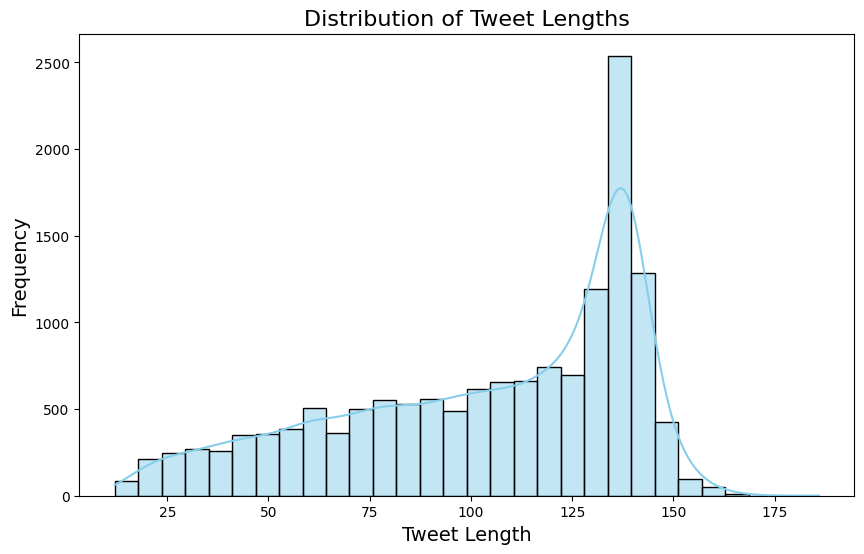

In [33]:
# Calculate the length of each tweet
df['tweet_length'] = df['text'].apply(len)
print(f"min tweet length: {min(df['tweet_length'])} and max tweet length: {max(df['tweet_length'])}")

# Plot the histogram for tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [34]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count,tweet_length
count,1.464000e+04,14640.000000,10522.000000,14640.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650,103.822063
std,7.791112e+14,0.162830,0.330440,0.745778,36.277339
min,5.675883e+17,0.335000,0.000000,0.000000,12.000000
25%,5.685592e+17,0.692300,0.360600,0.000000,77.000000
50%,5.694779e+17,1.000000,0.670600,0.000000,114.000000
75%,5.698905e+17,1.000000,1.000000,0.000000,136.000000
max,5.703106e+17,1.000000,1.000000,44.000000,186.000000


In [35]:
df.shape

(14640, 16)

**Now Check Nan value in our dataset**

In [36]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
tweet_length                        0
dtype: int64

In [37]:
# Count the number of rows before removing duplicates
initial_count = df.shape[0]

# Remove duplicates
df = df.drop_duplicates()

# Count the number of rows after removing duplicates
final_count = df.shape[0]

# Print the number of removed duplicates
print(f"Number of removed duplicates: {initial_count - final_count}")


Number of removed duplicates: 36


In [38]:
# Print one positive, one neutral, and one negative tweet
print("Positive Tweet:")
print(df[df['airline_sentiment'] == 'positive']['text'].iloc[10])  # Accessing the first positive tweet

print("\nNeutral Tweet:")
print(df[df['airline_sentiment'] == 'neutral']['text'].iloc[1500])  # Accessing the first neutral tweet

print("\nNegative Tweet:")
print(df[df['airline_sentiment'] == 'negative']['text'].iloc[1000])  # Accessing the first negative tweet


Positive Tweet:
@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.

Neutral Tweet:
@SouthwestAir I absolutely will. Where can I send it?

Negative Tweet:
@united every time I search a flight your site logs me out and gives error message. About to book on a different airline and Cancelled Flight my card.


# DATA VISUALIZATION

Total number of sentiments of tweets :
airline_sentiment
negative    9159
neutral     3091
positive    2354
Name: count, dtype: int64


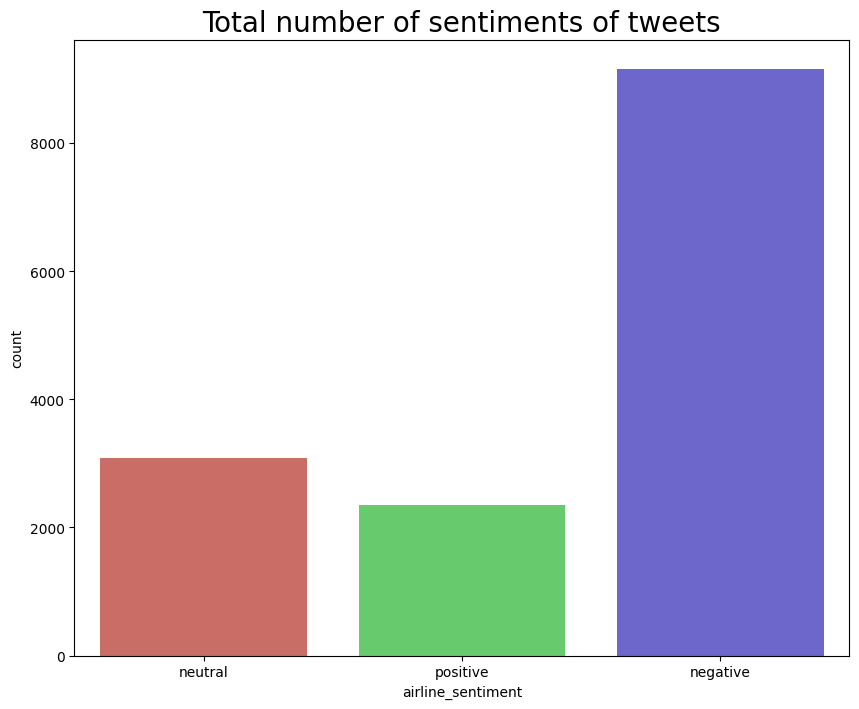

In [39]:
print("Total number of sentiments of tweets :")
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df, palette = 'hls')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

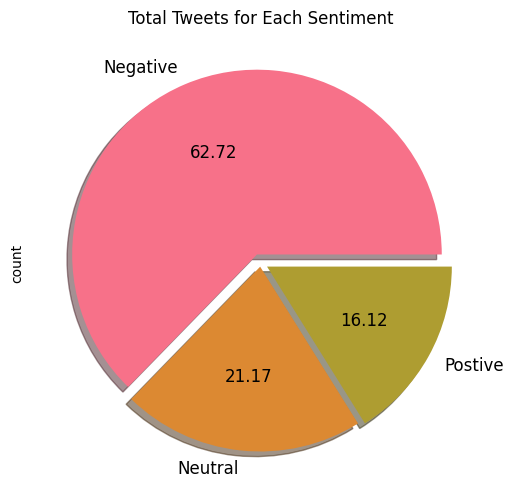

In [40]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

In [41]:
print("Total number of tweets for each airline :")
print(df.groupby('airline')['airline_sentiment'].count())

Total number of tweets for each airline :
airline
American          2723
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


Text(0, 0.5, 'No.of Tweets')

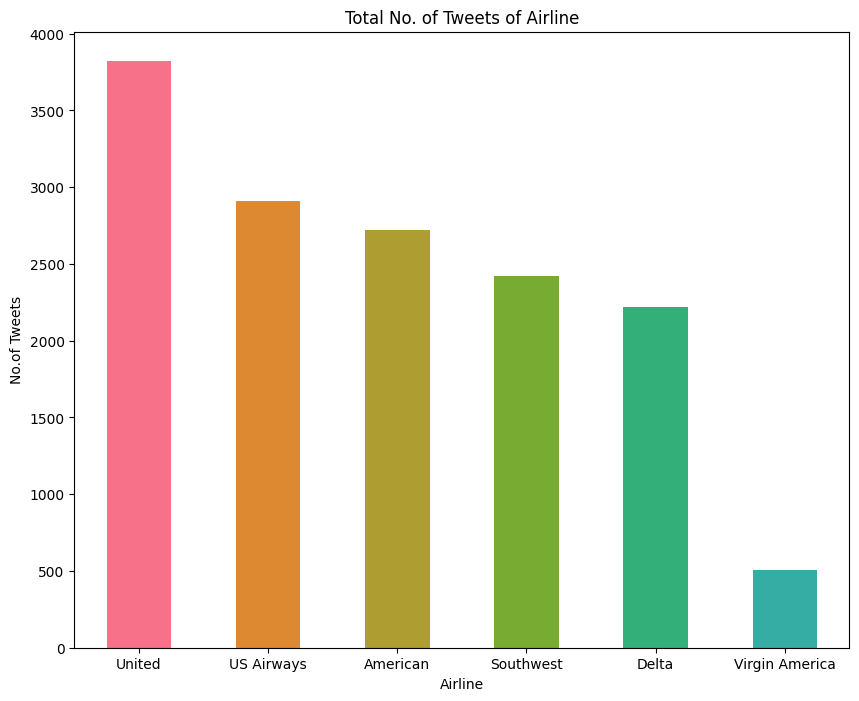

In [42]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

In [43]:
print("Total number of sentiment tweets for each airline :")
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for i in airlines:
    print('{} : \n'.format(i), df.loc[df.airline == i].airline_sentiment.value_counts())

Total number of sentiment tweets for each airline :
US Airways : 
 airline_sentiment
negative    2263
neutral      381
positive     269
Name: count, dtype: int64
United : 
 airline_sentiment
negative    2633
neutral      697
positive     492
Name: count, dtype: int64
American : 
 airline_sentiment
negative    1941
neutral      455
positive     327
Name: count, dtype: int64
Southwest : 
 airline_sentiment
negative    1186
neutral      664
positive     570
Name: count, dtype: int64
Delta : 
 airline_sentiment
negative    955
neutral     723
positive    544
Name: count, dtype: int64
Virgin America : 
 airline_sentiment
negative    181
neutral     171
positive    152
Name: count, dtype: int64


**Now Reasons Of Negative Tweets**

Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


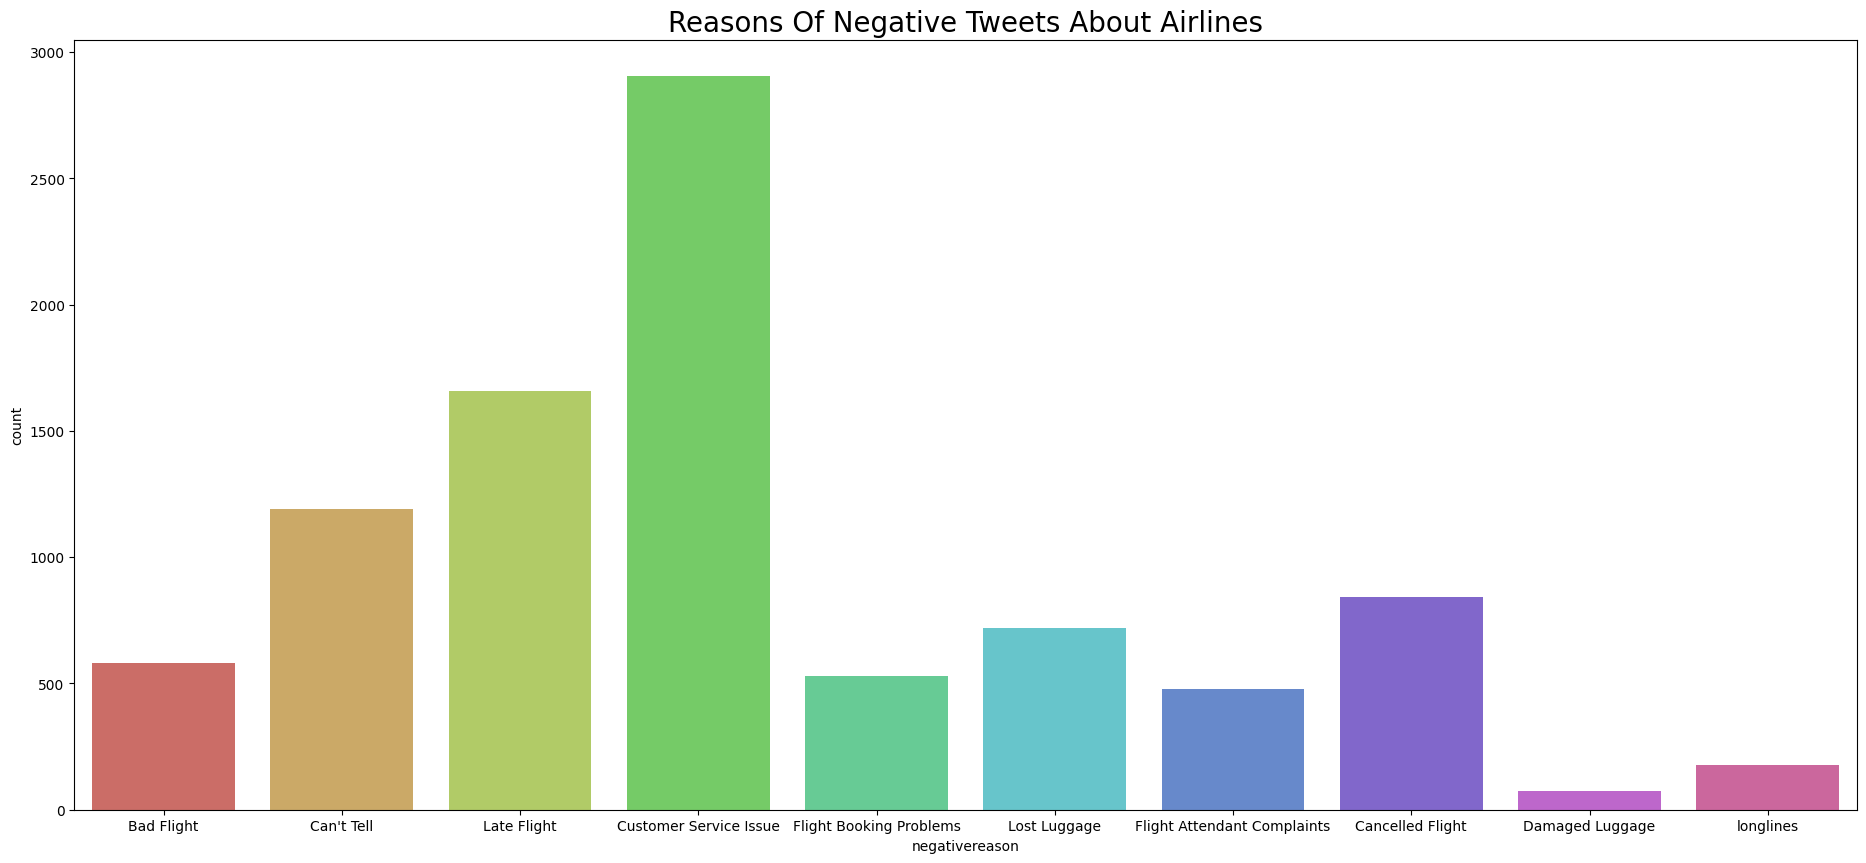

In [44]:
print('Reasons Of Negative Tweets :')
print(df.negativereason.value_counts())

plt.figure(figsize = (23, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

**Now Reasons Of Negative Tweets on Every AirLine Company**

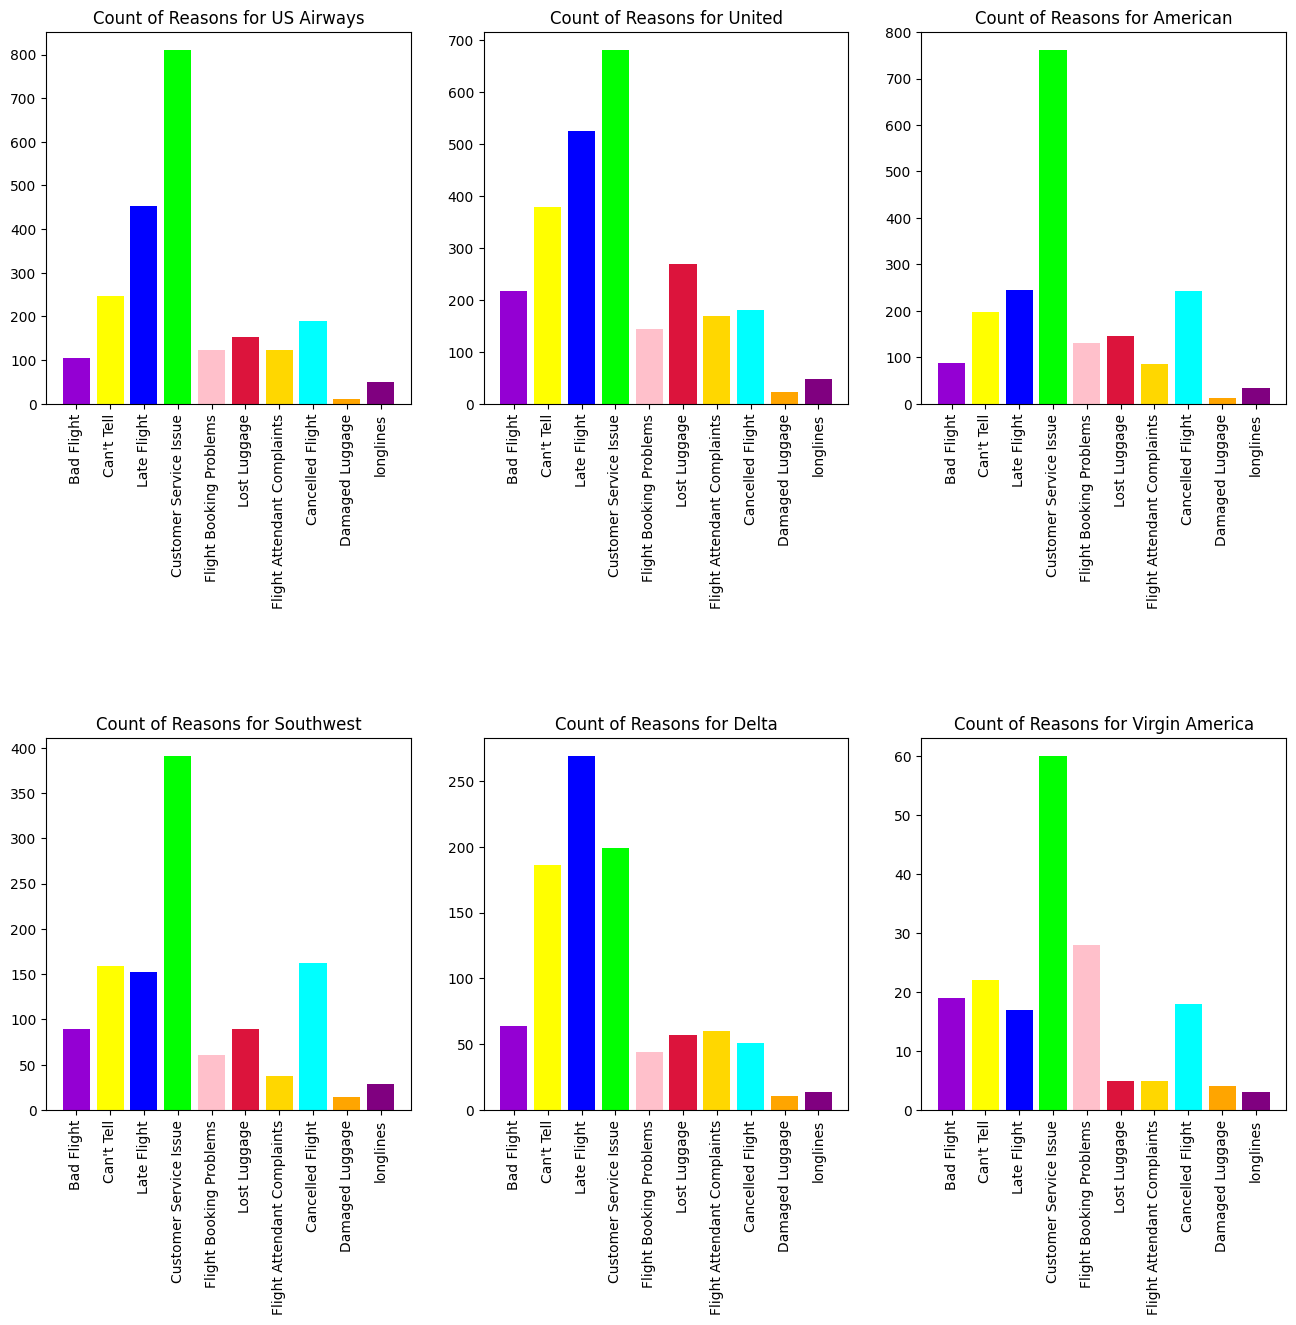

In [45]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)

plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

# Split Text Of Sentiments

In [46]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

# TEXT PREPROCESSING AND CLEANING

In [47]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [48]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [49]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14604, dtype: int64

In [51]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [52]:
import nltk
import re
import string
# Download the 'stopwords' dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text
# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text']


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [54]:
X = df['final_text']
y = df['airline_sentiment']

**Now Apply TFIDF on cleaned tweets**

In [55]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

# HANDLING IMBALANCE

In [56]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

# Split Data into train & test

In [57]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

# Train the models

**Accuracies**


In [58]:
# SVM MODEL
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)
print("SVM_accuracy:", accuracy_score(svm_prediction,y_test))

# KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
accuracy1 = accuracy_score(knn_predictions, y_test)
print("KNN_Accuracy:", accuracy1)

# NAIVE BAYES MODEL
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
accuracy2 = accuracy_score(nb_predictions, y_test)
print("NaiveBayes_Accuracy:", accuracy2)

# DECISION TREE MODEL
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
accuracy3 = accuracy_score(dt_predictions, y_test)
print("DecisionTree_Accuracy:", accuracy3)

# RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
accuracy4 = accuracy_score(rf_predictions, y_test)
print("RandomForest_Accuracy:", accuracy4)

SVM_accuracy: 0.9406113537117904
KNN_Accuracy: 0.5991266375545852
NaiveBayes_Accuracy: 0.8592430858806405
DecisionTree_Accuracy: 0.9401746724890829
RandomForest_Accuracy: 0.9585152838427947


**Classification reports**

In [59]:
cr = classification_report(y_test, svm_prediction)
print("Classification Report of SVM:\n----------------------\n", cr)


cr1 = classification_report(y_test, knn_predictions)
print("Classification Report of KNN:\n----------------------\n", cr1)


cr2 = classification_report(y_test, nb_predictions)
print("Classification Report of Naive Bayes:\n----------------------\n", cr2)


cr3 = classification_report(y_test, dt_predictions)
print("Classification Report of Decision Tree:\n----------------------\n", cr3)


cr4 = classification_report(y_test, rf_predictions)
print("Classification Report of Random Forest:\n----------------------\n", cr4)

Classification Report of SVM:
----------------------
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2274
           1       0.89      0.95      0.92      2258
           2       0.97      0.87      0.92      2338

    accuracy                           0.94      6870
   macro avg       0.94      0.94      0.94      6870
weighted avg       0.94      0.94      0.94      6870

Classification Report of KNN:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.05      0.10      2274
           1       0.51      0.89      0.65      2258
           2       0.71      0.85      0.78      2338

    accuracy                           0.60      6870
   macro avg       0.74      0.60      0.51      6870
weighted avg       0.74      0.60      0.51      6870

Classification Report of Naive Bayes:
----------------------
               precision    recall  f1-score   support

           0 

**Confusion matrix & ROC curve**


SVM Confusion Matrix:


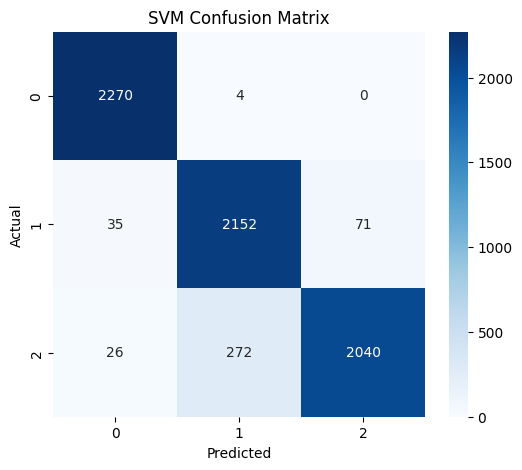

SVM AUC Score: 0.9776


<Figure size 800x600 with 0 Axes>

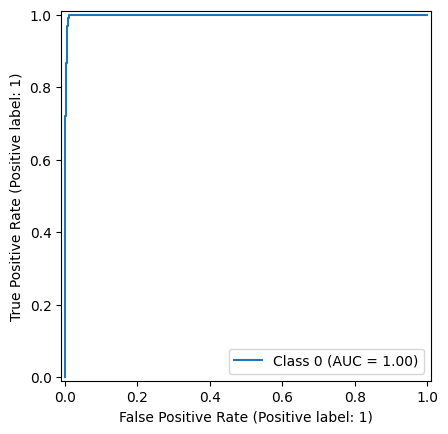

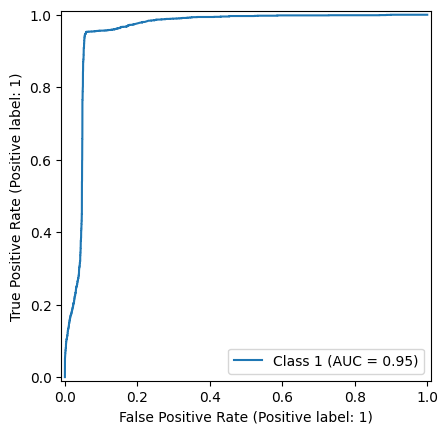

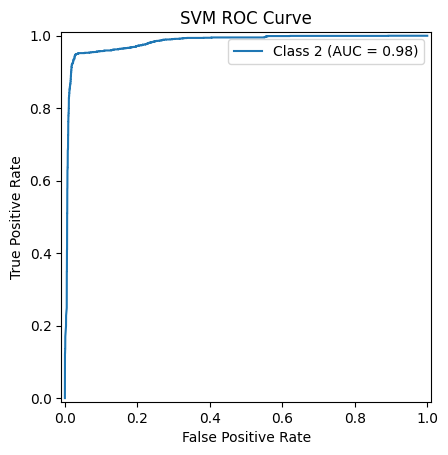


KNN Confusion Matrix:


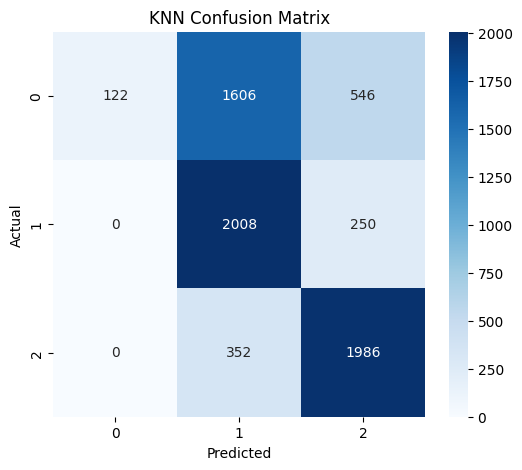


Naive Bayes Confusion Matrix:


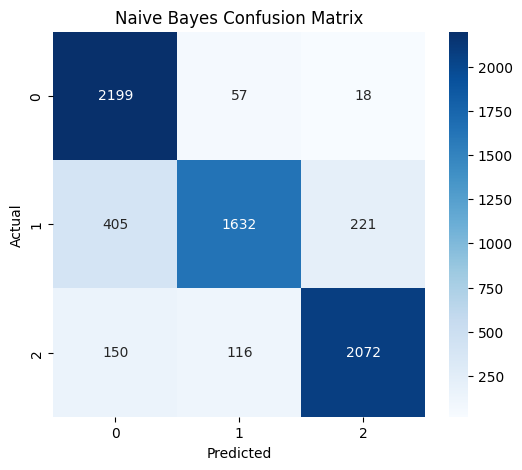

Naive Bayes AUC Score: 0.9628


<Figure size 800x600 with 0 Axes>

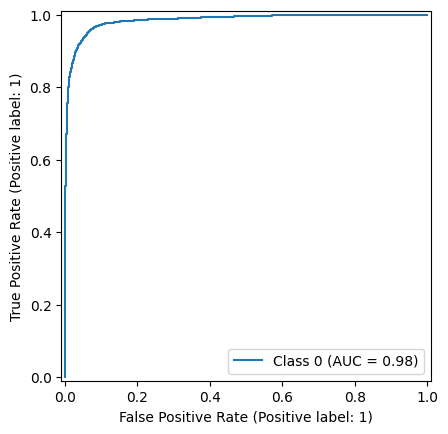

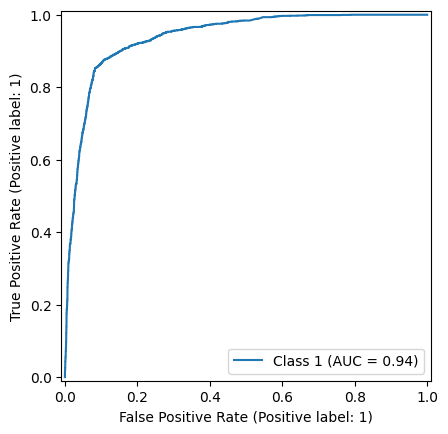

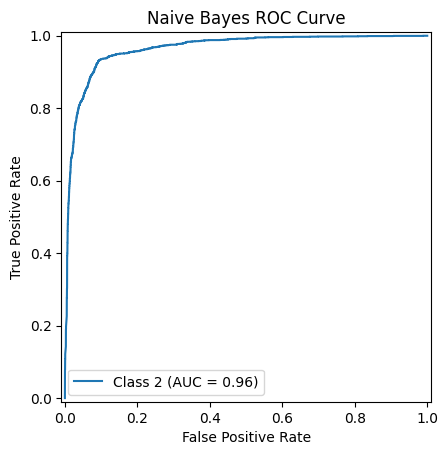


Decision Tree Confusion Matrix:


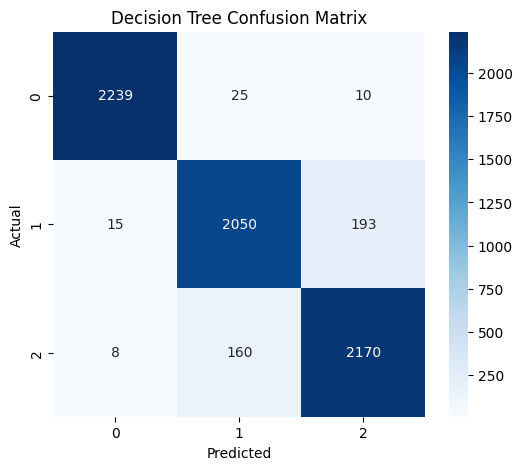

Decision Tree AUC Score: 0.9578


<Figure size 800x600 with 0 Axes>

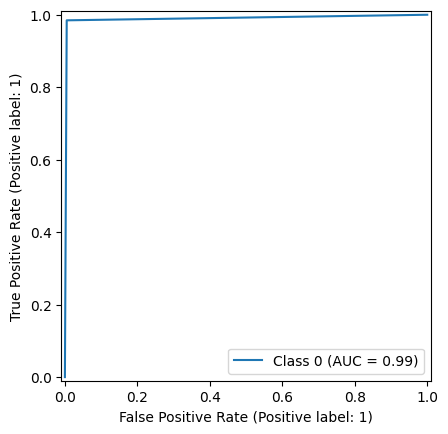

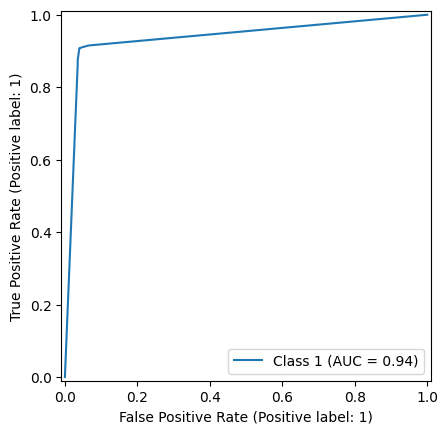

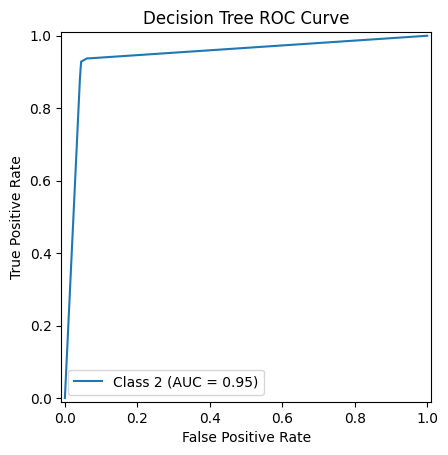


Random Forest Confusion Matrix:


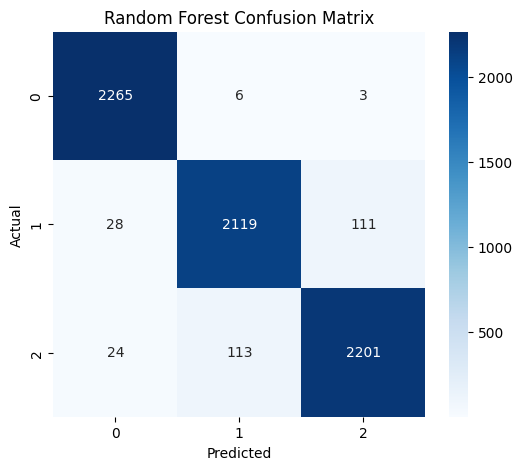

Random Forest AUC Score: 0.9919


<Figure size 800x600 with 0 Axes>

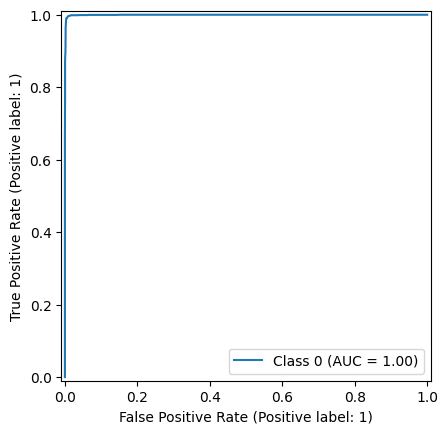

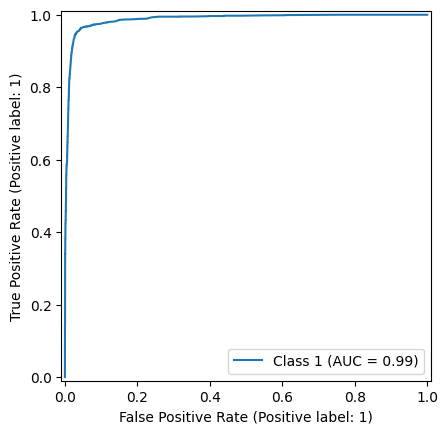

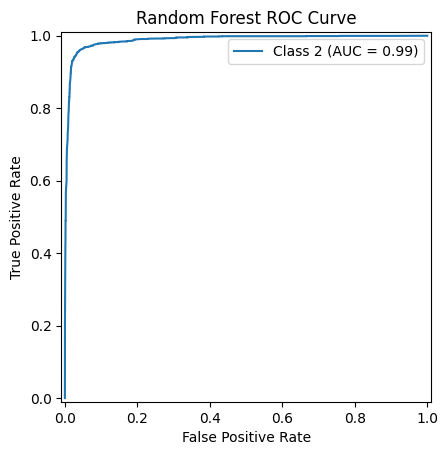

In [63]:
# Binarize the labels for ROC AUC (one-vs-rest)
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

models = {
    "SVM": (svm_prediction, svm.decision_function(X_test)),
    "KNN": (knn_predictions, None),  # KNN does not produce probabilities directly
    "Naive Bayes": (nb_predictions, nb.predict_proba(X_test)),
    "Decision Tree": (dt_predictions, dt.predict_proba(X_test)),
    "Random Forest": (rf_predictions, rf.predict_proba(X_test)),
}

for model_name, (predictions, decision_or_prob) in models.items():
    print(f"\n{model_name} Confusion Matrix:")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC and AUC for models with probabilities or decision function
    if decision_or_prob is not None:
        if decision_or_prob.ndim == 1:  # SVM decision_function for multiclass
            y_score = label_binarize(decision_or_prob, classes=classes)
        else:
            y_score = decision_or_prob
        
        auc_score = roc_auc_score(y_test_binarized, y_score, multi_class="ovr", average="macro")
        print(f"{model_name} AUC Score: {auc_score:.4f}")
        
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(classes):
            RocCurveDisplay.from_predictions(
                y_test_binarized[:, i], y_score[:, i], name=f"Class {class_label}"
            )
        plt.title(f"{model_name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
